# Case Study 1: Classify Personal Income

In [28]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

### To partition the data

In [29]:
from sklearn.model_selection import train_test_split

### Importing library for logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

### Importing performance metrics- 
### Accuracy score and confusion matrix

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
# os.listdir()

In [33]:
data_income = pd.read_csv('income.csv')

In [34]:
df = data_income.copy()

### check variable data types

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [36]:
df.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


### Find missing values

In [37]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

### Summary of numerical variable

In [38]:
sumnum = df.describe()

In [39]:
sumnum

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Summary of categorical variable

In [40]:
sumcate = df.describe(include='O')

In [41]:
sumcate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


### Frequency of each category

In [42]:
df['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [43]:
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

### checking for unique classes

In [44]:
np.unique(df['JobType'])

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [45]:
np.unique(df['occupation'])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

### replaece ? with nan values

In [46]:
data = pd.read_csv('income.csv', na_values=[' ?'])

### Data Preprocessing

In [47]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [48]:
missing = data[data.isnull().any(axis=1)]

#### axis=1 --> to consider at least one col. value is missing

In [49]:
missing.head(10)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
57,72,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,"less than or equal to 50,000"
69,53,NaN,5th-6th,Widowed,NaN,Unmarried,Black,Female,0,0,30,United-States,"less than or equal to 50,000"
73,57,NaN,Assoc-voc,Widowed,NaN,Unmarried,White,Female,0,0,38,United-States,"less than or equal to 50,000"
75,20,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,24,United-States,"less than or equal to 50,000"
76,21,NaN,Some-college,Never-married,NaN,Unmarried,White,Female,0,0,35,United-States,"less than or equal to 50,000"


In [50]:
missing.sort_values(['JobType'])

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
31296,30,Never-worked,HS-grad,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,"less than or equal to 50,000"
31305,18,Never-worked,Some-college,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,"less than or equal to 50,000"
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


### Missing val in JobType      = 1809
### Missing val in Occupation = 1816
### 1816-1807 = 7  ==> Since jobtype is 'Never Worked', 
### occupation is unfilled of these 7 rows.

In [51]:
data2 = data.dropna(axis=0)

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
age              30162 non-null int64
JobType          30162 non-null object
EdType           30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
gender           30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
SalStat          30162 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          30169 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       30162 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


### Relationship between independent variables

In [54]:
correlation = data2.corr()

In [55]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


## Cross tables and Data visualization

In [56]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

### gender proportion

In [57]:
gender = pd.crosstab(index = data2['gender'],
                    columns = 'count',
                     normalize=True
                    )

In [58]:
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


### gender vs. salary status

In [59]:
gender_salstat = pd.crosstab(index= data['gender'],
                            columns = data['SalStat'],
                             margins = True,
                             normalize = 'index'
                            )

In [60]:
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.109540                       0.890460
 Male                0.305709                       0.694291
All                  0.240634                       0.759366


### frequency distribution of salary status

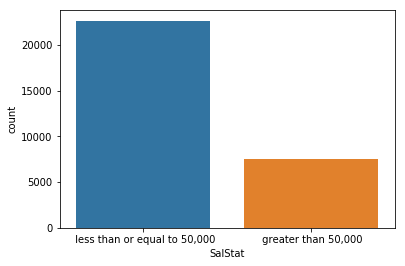

In [61]:
Salstat = sns.countplot(data2['SalStat'])

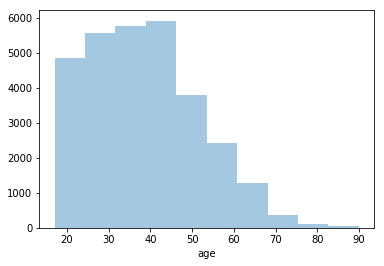

In [62]:
sns.distplot(data2['age'], bins=10, kde=False)

## Bivariate analysis for Age vs Salstat

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

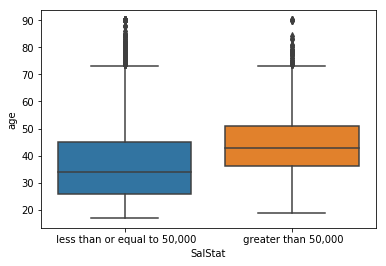

In [63]:
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

## Do bivariate analysis for

In [64]:
1. jobtype vs. Salary status
2. Education vs. Salary status
3. Occupation vs. Salary status
4. Hoursper week vs . Salary status
5. Capital Gain


SyntaxError: invalid syntax (<ipython-input-64-e4846cbe1de3>, line 1)

# Logistic Regression Model

### Reindex salstat names to 0,1

In [70]:
# print(data2['SalStat'])

data2['SalStat'] = data2['SalStat'].map(
        {
            ' less than or equal to 50,000':0,
            ' greater than 50,000':1
        }
)

/Users/guneshs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
# data2['SalStat']

In [74]:
new_data = pd.get_dummies( data2, drop_first = True)

In [75]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## dividde cols to dependent and indepenednt
# dependent = y
# indepent = x

### Storing col. names

In [76]:
columns_list = list(new_data.columns)

In [77]:
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

### Separating inout names from data (dependent valriables)

In [78]:
features = list( set(columns_list)- set(new_data['SalStat']))

In [79]:
print(features)

['occupation_ Craft-repair', 'maritalstatus_ Married-civ-spouse', 'race_ Black', 'nativecountry_ Italy', 'EdType_ Preschool', 'JobType_ State-gov', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Columbia', 'nativecountry_ Hong', 'nativecountry_ Puerto-Rico', 'JobType_ Self-emp-not-inc', 'relationship_ Other-relative', 'nativecountry_ Canada', 'EdType_ Assoc-voc', 'maritalstatus_ Never-married', 'EdType_ Prof-school', 'nativecountry_ United-States', 'nativecountry_ Hungary', 'EdType_ Assoc-acdm', 'age', 'relationship_ Wife', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'relationship_ Own-child', 'nativecountry_ Vietnam', 'EdType_ Bachelors', 'JobType_ Self-emp-inc', 'JobType_ Local-gov', 'EdType_ Masters', 'nativecountry_ China', 'relationship_ Not-in-family', 'EdType_ HS-grad', 'race_ White', 'nativecountry_ Thailand', 'SalStat', 'occupation_ Priv-house-serv', 'nativecountry_ South', 'nativecountry_ Nicaragua', 'maritalstatus_ Widowed', 'nativecountry_ India', 'capitalloss', 'nat

### Storing output values in y (Independent)

In [80]:
y = new_data['SalStat'].values

In [81]:
print(y)

[0 0 1 ... 0 0 0]


### Storing the values from input features ( Dependent)

In [82]:
x = new_data[features].values

In [83]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


### Splitting the data into train test split

In [84]:
train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size = 0.3, random_state = 0
)

### Make an instance of the model